** Task 2: Customer Segmentation Using Unsupervised Learning**

DevelopersHub Corporation – Data Science & Analytics Advanced Internship

 **Problem Statement & Objective**
 **Problem Statement**

Retail businesses need to understand customer behavior to design effective marketing strategies. Treating all customers the same leads to inefficient marketing.

 **Objective**

To segment customers into meaningful groups based on their spending habits using K-Means clustering, visualize the clusters using PCA / t-SNE, and propose marketing strategies for each segment.

 **Dataset Description & Loading**
 **Dataset**

**Name:** Mall Customers Dataset

**Attributes:**

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1–100)

In [3]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


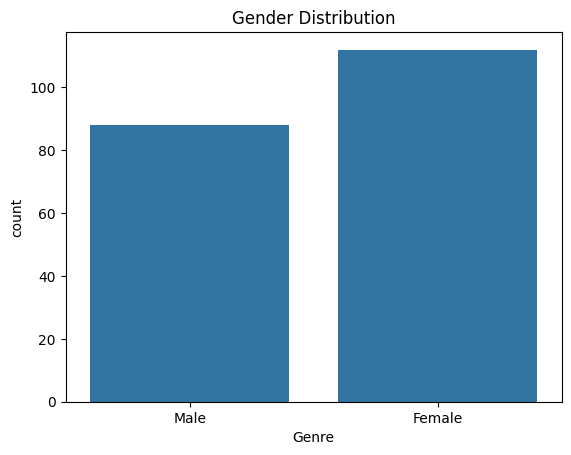

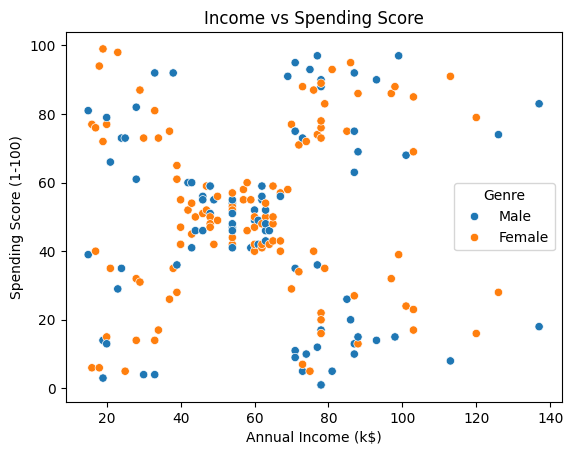

In [5]:
# Exploratory Data Analysis (EDA)
# Dataset Info

df.info()
df.describe()

# Gender Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Genre', data=df)
plt.title("Gender Distribution")
plt.show()

# Annual Income vs Spending Score

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Genre',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()

# EDA Insight:
# Customers with similar income levels show very different spending behaviors, making clustering useful.

In [7]:
# Data Preprocessing
# Encode Gender

df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Feature Selection for Clustering

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling

from sklearn.preprocessing import StandardScaler

schaler = StandardScaler()
X_scaled = schaler.fit_transform(X)

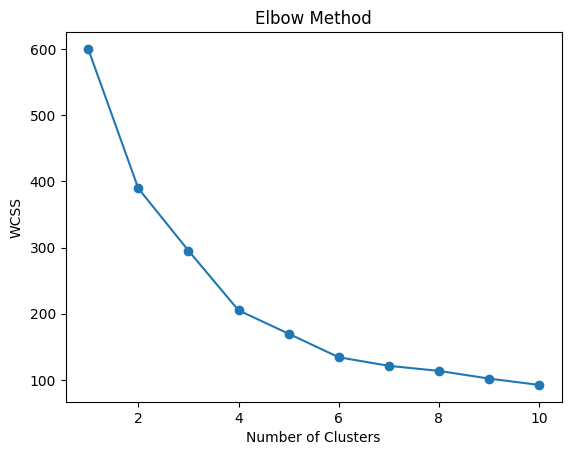

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,3
3,4,1,23,16,77,2
4,5,1,31,17,40,2


In [8]:
# K-Means Clustering
# Elbow Method (Optimal K)

from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Observation:
# The elbow is clearly visible at K = 5.

# Apply K-Means (K = 5)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()

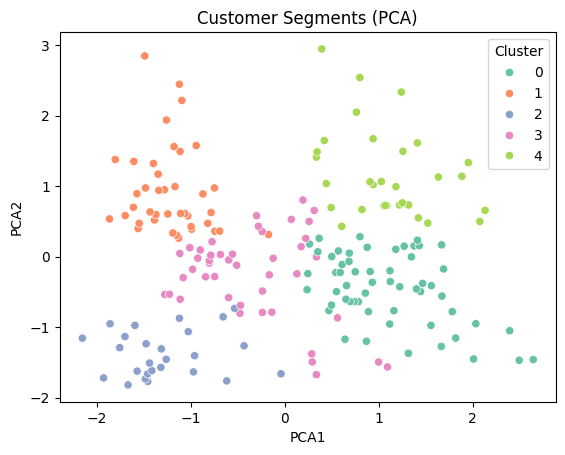

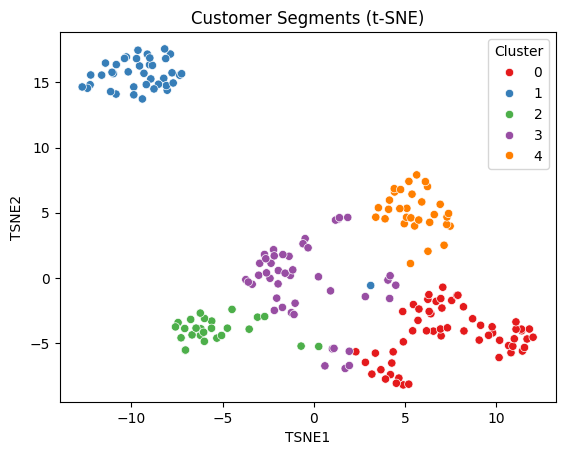

In [9]:
# Cluster Visualization
# PCA (2D Visualization)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    data=df
)
plt.title("Customer Segments (PCA)")
plt.show()

# t-SNE Visualization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title("Customer Segments (t-SNE)")
plt.show()

In [10]:
# Cluster Analysis
# Mean Values per Cluster

df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


** Marketing Strategy Suggestions**

**Cluster 0 — High Income, High Spending**

**Strategy:**

Premium memberships

Exclusive discounts

Personalized luxury offers

🔵 Cluster 1 — Low Income, High Spending

Strategy:

Loyalty programs

Budget-friendly promotions

Discount campaigns

🟠 Cluster 2 — High Income, Low Spending

Strategy:

Targeted advertising

Product recommendations

Upselling strategies

🟣 Cluster 3 — Low Income, Low Spending

Strategy:

Mass promotions

Awareness campaigns

Entry-level products

🔴 Cluster 4 — Moderate Income & Spending

Strategy:

Seasonal offers

Cross-selling

Engagement-focused marketing

** Final Conclusion & Insights**

1. K-Means successfully segmented customers into 5 distinct groups

2. PCA and t-SNE clearly visualized cluster separation

3. Each cluster represents different spending behavior

4. Targeted marketing strategies can significantly improve customer engagement and sales